Projeto Controle de Entrega 

Objetivo: Desenvolver um sistema centralizado para monitorar, gerenciar e analisar entregas, ajudando empresas a melhorar sua logística, melhorar a experiência do cliente e reduzir custos operacionais.

In [1]:
# Importando bibliotecas para modelagem de dados
import pandas as pd
import numpy as np

Carregando as bases de dados e verificando suas informações

In [2]:
# Abrir base de dados
historico_entregas = pd.read_excel(r'C:\\Backup 2024 02 07\\Usuário\Desktop\\portifolio\subir github\\Refazendo projetos\\Pedidos de entrega\\Pedidos de entrega Excel\\historico_entregas_atualizados.xlsx')

# Exibir 2 linhas
historico_entregas.head(2)

,Entrega_ID,Pedido_ID,Data_Coleta,Data_Entrega,Veiculo,Motorista_ID,Atraso_h
0,501,1,01/11/2022,02/11/2022,Van,205,0
1,502,2,02/11/2022,03/11/2022,Caminhão,206,3


In [3]:
# Verificando tamanho e linhas
historico_entregas.shape

(100, 7)

In [4]:
# Verificando quantidade duplicada
historico_entregas.drop_duplicates().count()

Entrega_ID      100
Pedido_ID       100
Data_Coleta     100
Data_Entrega    100
Veiculo         100
Motorista_ID    100
Atraso_h        100
dtype: int64

In [5]:
# Verificando valores faltantes
historico_entregas.isnull().count()

Entrega_ID      100
Pedido_ID       100
Data_Coleta     100
Data_Entrega    100
Veiculo         100
Motorista_ID    100
Atraso_h        100
dtype: int64

In [6]:
# Abrir base de dados
taxa_entrega = pd.read_excel(r'C:\\Backup 2024 02 07\\Usuário\\Desktop\\portifolio\\subir github\\Refazendo projetos\\Pedidos de entrega\\Pedidos de entrega Excel\\taxas_entrega.xlsx')

# Exibir 2 linhas
taxa_entrega.head(2)

,Origem_Local,Destino_Local,Distancia_km,Tempo_Estimado_h,Taxa_Base,Taxa_Km,Taxa_Volume
0,São Paulo - SP,São Paulo - SP,20,1,10,0.5,2.0
1,Rio de Janeiro - RJ,Rio de Janeiro - RJ,450,6,50,0.7,3.0


In [7]:
# Verificando tamanho e linhas
taxa_entrega.shape

(3, 7)

In [8]:
# Verificando quantidade duplicada
taxa_entrega.drop_duplicates().count()

Origem_Local        3
Destino_Local       3
Distancia_km        3
Tempo_Estimado_h    3
Taxa_Base           3
Taxa_Km             3
Taxa_Volume         3
dtype: int64

In [9]:
# Verificando valores faltantes
taxa_entrega.isnull().count()

Origem_Local        3
Destino_Local       3
Distancia_km        3
Tempo_Estimado_h    3
Taxa_Base           3
Taxa_Km             3
Taxa_Volume         3
dtype: int64

In [10]:
# Abrir base de dados
pedidos = pd.read_excel(r'C:\\Backup 2024 02 07\\Usuário\\Desktop\\portifolio\\subir github\\Refazendo projetos\\Pedidos de entrega\\Pedidos de entrega Excel\\pedidos.xlsx')

# Exibir 2 linhas
pedidos.head(2)

,Pedido_ID,Cliente_ID,Data_Pedido,Valor_Pedido,Local_Entrega,Volume (m³),Peso (kg),Status
0,1,45,2024-11-01,152.57,Belo Horizonte - MG,0.13,19.82,Entregue
1,2,18,2024-11-02,242.20,Rio de Janeiro - RJ,0.13,8.84,Em Trânsito


In [11]:
# Verificando tamanho e linhas
pedidos.shape

(100, 8)

In [12]:
# Verificando quantidade duplicada
pedidos.drop_duplicates().count()

Pedido_ID        100
Cliente_ID       100
Data_Pedido      100
Valor_Pedido     100
Local_Entrega    100
Volume (m³)      100
Peso (kg)        100
Status           100
dtype: int64

In [13]:
# Verificando valores faltantes
pedidos.isnull().count()

Pedido_ID        100
Cliente_ID       100
Data_Pedido      100
Valor_Pedido     100
Local_Entrega    100
Volume (m³)      100
Peso (kg)        100
Status           100
dtype: int64

In [14]:
# Abrir base de dados
motorista = pd.read_excel(r'C:\\Backup 2024 02 07\\Usuário\\Desktop\\portifolio\\subir github\\Refazendo projetos\\Pedidos de entrega\\Pedidos de entrega Excel\\motoristas.xlsx')

# Exibir 2 linhas
motorista.head(2)

,Motorista_ID,Nome,Experiencia_anos,Avaliacao
0,201,Alejandro Roberson,9,3.7
1,202,Brian Curtis,1,4.2


In [15]:
# Verificando tamanho e linhas
motorista.shape

(10, 4)

In [16]:
# Verificando quantidade duplicada
motorista.drop_duplicates().count()

Motorista_ID        10
Nome                10
Experiencia_anos    10
Avaliacao           10
dtype: int64

In [17]:
# Verificando valores faltantes
motorista.isnull().count()

Motorista_ID        10
Nome                10
Experiencia_anos    10
Avaliacao           10
dtype: int64

In [18]:
# Abrir base de dados
clientes = pd.read_excel(r'C:\\Backup 2024 02 07\\Usuário\\Desktop\\portifolio\\subir github\\Refazendo projetos\\Pedidos de entrega\\Pedidos de entrega Excel\\clientes.xlsx')

# Exibir 2 linhas
clientes.head(2)

,Cliente_ID,Nome,Localizacao,Tipo_Cliente
0,1,Jonathan Bradshaw,Belo Horizonte - MG,Pessoa Jurídica
1,2,Erika Smith,São Paulo - SP,Pessoa Física


In [19]:
# Verificando tamanho e linhas
clientes.shape

(50, 4)

In [20]:
# Verificando quantidade duplicada
clientes.drop_duplicates().count()

Cliente_ID      50
Nome            50
Localizacao     50
Tipo_Cliente    50
dtype: int64

In [21]:
# Verificando valores faltantes
clientes.isnull().count()

Cliente_ID      50
Nome            50
Localizacao     50
Tipo_Cliente    50
dtype: int64

Começando as análises

In [22]:
# Verificando todas as colunas
historico_entregas.columns

Index(['Entrega_ID', 'Pedido_ID', 'Data_Coleta', 'Data_Entrega', 'Veiculo',
       'Motorista_ID', 'Atraso_h'],
      dtype='object')

In [23]:
# Valores únicos coluna 'Data_Coleta'
historico_entregas['Data_Coleta'].unique()

array(['01/11/2022', '02/11/2022', '03/11/2022', '04/11/2022',
       '05/11/2022', '06/11/2022', '07/11/2022', '08/11/2022',
       '09/11/2022', '10/11/2022', '11/11/2022', '12/11/2022',
       '13/11/2022', '14/11/2022', '15/11/2022', '16/11/2022',
       '17/11/2022', '18/11/2022', '19/11/2022', '20/11/2022',
       '21/11/2022', '22/11/2022', '23/11/2022', '24/11/2022',
       '25/11/2022', '26/11/2022', '27/11/2022', '28/11/2022',
       '29/11/2022', '30/11/2022', '01/12/2022', '02/12/2022',
       '03/12/2022', '04/12/2022', '05/12/2022', '06/12/2022',
       '07/12/2022', '08/12/2022', '09/12/2022', '10/12/2022',
       '11/12/2022', '12/12/2022', '13/12/2022', '14/12/2022',
       '15/12/2022', '16/12/2022', '17/12/2022', '18/12/2022',
       '19/12/2022', '20/12/2022', '21/12/2022', '22/12/2022',
       '23/12/2022', '24/12/2022', '25/12/2022', '26/12/2022',
       '27/12/2022', '28/12/2022', '29/12/2022', '30/12/2022',
       '31/12/2022', '01/01/2023', '02/01/2023', '03/01

In [24]:
# Padrão esperado para data: XX/XX/XXXX
padrao = r'^\d{2}\/\d{2}\/\d{4}$'

# Verificar quais datas não seguem o padrão
historico_entregas['Nao_Padrao'] = historico_entregas['Data_Coleta'].str.match(padrao, na=False)

# Filtrar os dados que NÃO estão no padrão
dados_fora_do_padrao = historico_entregas[~historico_entregas['Nao_Padrao']]

# Exibir resultado
print(f"Dados que não seguem o padrão esperado:\n{dados_fora_do_padrao[['Data_Coleta']]}")

Dados que não seguem o padrão esperado:
Empty DataFrame
Columns: [Data_Coleta]
Index: []


In [25]:
# Valores únicos coluna 'Data_Entrega'
historico_entregas['Data_Entrega'].unique()

array(['02/11/2022', '03/11/2022', '04/11/2022', '05/11/2022',
       '07/11/2022', '08/11/2022', '09/11/2022', '11/11/2022',
       '13/11/2022', '14/11/2022', '15/11/2022', '17/11/2022',
       '18/11/2022', '20/11/2022', '22/11/2022', '23/11/2022',
       '25/11/2022', '26/11/2022', '27/11/2022', '28/11/2022',
       '29/11/2022', '30/11/2022', '02/12/2022', '03/12/2022',
       '05/12/2022', '06/12/2022', '07/12/2022', '08/12/2022',
       '09/12/2022', '10/12/2022', '11/12/2022', '12/12/2022',
       '14/12/2022', '15/12/2022', '16/12/2022', '18/12/2022',
       '19/12/2022', '21/12/2022', '22/12/2022', '23/12/2022',
       '24/12/2022', '26/12/2022', '27/12/2022', '28/12/2022',
       '30/12/2022', '01/01/2023', '02/01/2023', '03/01/2023',
       '05/01/2023', '06/01/2023', '07/01/2023', '08/01/2023',
       '10/01/2023', '11/01/2023', '12/01/2023', '13/01/2023',
       '15/01/2023', '16/01/2023', '17/01/2023', '19/01/2023',
       '21/01/2023', '22/01/2023', '23/01/2023', '25/01

In [26]:
# Padrão esperado para data: XX/XX/XXXX
padrao = r'^\d{2}\/\d{2}\/\d{4}$'

# Verificar quais datas não seguem o padrão
historico_entregas['Nao_Padrao'] = historico_entregas['Data_Entrega'].str.match(padrao, na=False)

# Filtrar os dados que NÃO estão no padrão
dados_fora_do_padrao = historico_entregas[~historico_entregas['Nao_Padrao']]

# Exibir resultado
print(f"Dados que não seguem o padrão esperado:\n{dados_fora_do_padrao[['Data_Entrega']]}")

Dados que não seguem o padrão esperado:
Empty DataFrame
Columns: [Data_Entrega]
Index: []


In [27]:
# Converter colunas para datetime
historico_entregas['Data_Coleta'] = pd.to_datetime(historico_entregas['Data_Coleta'], format='%d/%m/%Y')
historico_entregas['Data_Entrega'] = pd.to_datetime(historico_entregas['Data_Entrega'], format='%d/%m/%Y')

# Calcular a diferença em dias
historico_entregas['Tempo_Entrega'] = (historico_entregas['Data_Entrega'] - historico_entregas['Data_Coleta']).dt.total_seconds() / (24 * 3600)

# Calcular o tempo médio
tempo_medio = historico_entregas['Tempo_Entrega'].mean()

# Separar dias e horas do tempo médio
dias = int(tempo_medio)  # Parte inteira (dias)
horas = (tempo_medio - dias) * 24  # Parte decimal convertida para horas

# Exibir resultados
print(f"Tempo médio de entrega: {tempo_medio:.2f} dias")
print(f"Ou aproximadamente: {dias} dias e {horas:.2f} horas")

Tempo médio de entrega: 1.47 dias
Ou aproximadamente: 1 dias e 11.28 horas


In [28]:
# Criei colunas separadas para 'Ano', 'Mes' e 'Dia'
historico_entregas['Ano'] = historico_entregas['Data_Entrega'].dt.year
historico_entregas['Mes'] = historico_entregas['Data_Entrega'].dt.month
historico_entregas['Dia'] = historico_entregas['Data_Entrega'].dt.day

In [29]:
# Valores únicos coluna 'Atraso_h'
atrasos = historico_entregas['Atraso_h'].unique()

# Ordenar
atrasos.sort() 

# Exibir resultado
atrasos 

array([0, 1, 2, 3, 4], dtype=int64)

In [30]:
# Estatística coluna 'Atraso_h'
historico_entregas['Atraso_h'].describe()

count    100.000000
mean       2.010000
std        1.396207
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Atraso_h, dtype: float64

In [31]:
print('Atrasos menor ou igual a duas horas no ano de 2022') # Exibir mensagem

# Filtro: atrasos menor ou igual a duas horas no ano de 2022
menor_2h_atrasos_2022 = historico_entregas.query('Atraso_h <= 2 and Ano == 2022')[['Dia','Mes','Ano','Entrega_ID']]

# Exibir 5 linhas
menor_2h_atrasos_2022.head() 

Atrasos menor ou igual a duas horas no ano de 2022


,Dia,Mes,Ano,Entrega_ID
0,2,11,2022,501
2,4,11,2022,503
3,5,11,2022,504
5,8,11,2022,506
6,9,11,2022,507


In [32]:
print('Atrasos menor ou igual a duas horas no ano de 2023') # Exibir mensagem

# Filtro: atrasos menor ou igual a duas horas no ano de 2023
menor_2h_atrasos_2023 = historico_entregas.query('Atraso_h <= 2 and Ano == 2023')[['Dia','Mes','Ano','Entrega_ID']]

# Exibir 5 linhas
menor_2h_atrasos_2023.head()

Atrasos menor ou igual a duas horas no ano de 2023


,Dia,Mes,Ano,Entrega_ID
59,1,1,2023,560
61,2,1,2023,562
62,3,1,2023,563
63,5,1,2023,564
65,7,1,2023,566


In [33]:
# Quantidade de atraso menor ou igual a duas horas
print(f'Quantidade de atraso menor ou igual a duas horas no ano de 2022: {menor_2h_atrasos_2022['Ano'].count()}') 
print()
print(f'Quantidade de atraso menor ou igual a duas horas no ano de 2023: {menor_2h_atrasos_2023['Ano'].count()}')

Quantidade de atraso menor ou igual a duas horas no ano de 2022: 30

Quantidade de atraso menor ou igual a duas horas no ano de 2023: 30


In [34]:
# Filtro por intervalo de dia, ano e atraso
menor_7_2022 = historico_entregas.query('Dia <= 7 & Ano == 2022 & Atraso_h <= 2')['Dia'].count()
menor_8_a_14_2022 = historico_entregas.query('Dia >= 8 and Dia <= 14 & Ano == 2022 & Atraso_h <= 2')['Dia'].count()
menor_15_a_21_2022 = historico_entregas.query('Dia >= 15 and Dia <= 21 & Ano == 2022 & Atraso_h <= 2')['Dia'].count()
menor_22_a_31_2022 = historico_entregas.query('Dia >= 22 and Dia <= 31 & Ano == 2022 & Atraso_h <= 2')['Dia'].count()

print('Quantidade de atrasos menor ou igual a duas horas no ano de 2022:') # Exibir mensagem

# Exibir resultados
print(f'Intervalo primeira semana: {menor_7_2022} atrasos')
print(f'Intervalo do dia 8 ao dia 14: {menor_8_a_14_2022} atrasos')
print(f'Intervalo do dia 15 ao dia 21: {menor_15_a_21_2022} atrasos')
print(f'Intervalo do dia 22 ao dia 31: {menor_22_a_31_2022} atrasos')

Quantidade de atrasos menor ou igual a duas horas no ano de 2022:
Intervalo primeira semana: 8 atrasos
Intervalo do dia 8 ao dia 14: 7 atrasos
Intervalo do dia 15 ao dia 21: 3 atrasos
Intervalo do dia 22 ao dia 31: 12 atrasos


In [35]:
# Filtro por intervalo de dia, ano e atraso
menor_7_2023 = historico_entregas.query('Dia <= 7 & Ano == 2023 & Atraso_h <= 2')['Dia'].count()
menor_8_a_14_2023 = historico_entregas.query('Dia >= 8 and Dia <= 14 & Ano == 2023 & Atraso_h <= 2')['Dia'].count()
menor_15_a_21_2023 = historico_entregas.query('Dia >= 15 and Dia <= 21 & Ano == 2023 & Atraso_h <= 2')['Dia'].count()
menor_22_a_31_2023 = historico_entregas.query('Dia >= 22 and Dia <= 31 & Ano == 2023& Atraso_h <= 2')['Dia'].count()

print('Quantidade de atrasos menor ou igual a duas horas no ano de 2023:') # Exibir mensagem

# Exibir resultados
print(f'Intervalo primeira semana: {menor_7_2023} atrasos')
print(f'Intervalo do dia 8 ao dia 14: {menor_8_a_14_2023} atrasos')
print(f'Intervalo do dia 15 ao dia 21: {menor_15_a_21_2023} atrasos')
print(f'Intervalo do dia 22 ao dia 31: {menor_22_a_31_2023} atrasos')

Quantidade de atrasos menor ou igual a duas horas no ano de 2023:
Intervalo primeira semana: 8 atrasos
Intervalo do dia 8 ao dia 14: 6 atrasos
Intervalo do dia 15 ao dia 21: 6 atrasos
Intervalo do dia 22 ao dia 31: 10 atrasos


In [36]:
print('Atraso maior ou igual a duas horas no ano de 2022') # Exibir mensagem

# Filtro por atraso e ano
maior_2h_atrasos_2022 = historico_entregas.query('Atraso_h >= 2 and Ano == 2022')[['Dia','Mes','Ano','Entrega_ID']]

# Exibir 5 linhas
maior_2h_atrasos_2022.head()

Atraso maior ou igual a duas horas no ano de 2022


,Dia,Mes,Ano,Entrega_ID
1,3,11,2022,502
4,7,11,2022,505
5,8,11,2022,506
8,11,11,2022,509
9,11,11,2022,510


In [37]:
print('Atraso maior ou igual a duas horas no ano de 2023') # Exibir mensagem

# Filtro por atraso e ano
maior_2h_atrasos_2023 = historico_entregas.query('Atraso_h >= 2 and Ano == 2023')[['Dia','Mes','Ano','Entrega_ID']]

# Exibir 5 linhas
maior_2h_atrasos_2023.head()

Atraso maior ou igual a duas horas no ano de 2023


,Dia,Mes,Ano,Entrega_ID
60,1,1,2023,561
63,5,1,2023,564
64,6,1,2023,565
66,8,1,2023,567
69,11,1,2023,570


In [38]:
# Quantidade de atraso maior ou igual a duas horas
print(f'Contagem de atrasos maior ou igual a duas horas do ano de 2022: {maior_2h_atrasos_2022['Ano'].count()}') 

print()

print(f'Contagem de atrasos maior ou igual a duas horas do ano de 2023: {maior_2h_atrasos_2023['Ano'].count()}')


Contagem de atrasos maior ou igual a duas horas do ano de 2022: 40

Contagem de atrasos maior ou igual a duas horas do ano de 2023: 21


In [39]:
# Filtro por intervalo de dia e atraso
maior_7_2022 = historico_entregas.query('Dia <= 7 & Ano == 2022 & Atraso_h >= 2')['Dia'].count()
maior_8_a_14_2022 = historico_entregas.query('Dia >= 8 and Dia <= 14 & Ano == 2022 & Atraso_h >= 2')['Dia'].count()
maior_15_a_21_2022 = historico_entregas.query('Dia >= 15 and Dia <= 21 & Ano == 2022 & Atraso_h >= 2')['Dia'].count()
maior_22_a_31_2022 = historico_entregas.query('Dia >= 22 and Dia <= 31 & Ano == 2022 & Atraso_h >= 2')['Dia'].count()

print('Quantidade de atrasos maior ou igual a duas horas no ano de 2022:') # Exibir mensagem

# Exibir resultado
print(f'Intervalo primeira semana: {maior_7_2022} atrasos')
print(f'Intervalo do dia 8 ao dia 14: {maior_8_a_14_2022} atrasos')
print(f'Intervalo do dia 15 ao dia 21: {maior_15_a_21_2022} atrasos')
print(f'Intervalo doa dia 22 ao dia 31: {maior_22_a_31_2022} atrasos')

Quantidade de atrasos maior ou igual a duas horas no ano de 2022:
Intervalo primeira semana: 5 atrasos
Intervalo do dia 8 ao dia 14: 10 atrasos
Intervalo do dia 15 ao dia 21: 11 atrasos
Intervalo doa dia 22 ao dia 31: 14 atrasos


In [40]:
# Filtro por intervalo de dia e atraso
maior_7_2023 = historico_entregas.query('Dia <= 7 & Ano == 2023 & Atraso_h >= 2')['Dia'].count()
maior_dia_8_a_14_2023 = historico_entregas.query('Dia >= 8 and Dia <= 14 & Ano == 2023 & Atraso_h >= 2')['Dia'].count()
maior_dia_15_a_21_2023 = historico_entregas.query('Dia >= 15 and Dia <= 21 & Ano == 2023 & Atraso_h >= 2')['Dia'].count()
maior_dia_22_a_31_2023 = historico_entregas.query('Dia >= 22 and Dia <= 31 & Ano == 2023 & Atraso_h >= 2')['Dia'].count()

print('Quantidade de atrasos maior ou igual a duas horas no ano de 2023:') # Exibir mensagem

# Exibir resultado
print(f'Intervalo primeira semana: {maior_7_2023} atrasos')
print(f'Intervalo do dia 8 ao dia 14: {maior_dia_8_a_14_2023} atrasos')
print(f'Intervalo doa dia 15 ao dia 21: {maior_dia_15_a_21_2023} atrasos')
print(f'Intervalo do dia 22 ao dia 30: {maior_dia_22_a_31_2023} atrasos')

Quantidade de atrasos maior ou igual a duas horas no ano de 2023:
Intervalo primeira semana: 7 atrasos
Intervalo do dia 8 ao dia 14: 4 atrasos
Intervalo doa dia 15 ao dia 21: 3 atrasos
Intervalo do dia 22 ao dia 30: 7 atrasos


In [41]:
print('Sem atrasos no ano de 2022') # Exibir mensagem

# Filtro: atraso e ano
sem_atrasos_2022 = historico_entregas.query('Atraso_h == 0 and Ano == 2022')[['Dia','Mes','Ano','Entrega_ID']]

# Exibir 5 linhas
sem_atrasos_2022.head()

Sem atrasos no ano de 2022


,Dia,Mes,Ano,Entrega_ID
0,2,11,2022,501
7,9,11,2022,508
37,10,12,2022,538
38,11,12,2022,539
48,21,12,2022,549


In [42]:
print('Sem atrasos no ano de 2023') # Exibir mensagem

# Filtro: atraso e ano
sem_atrasos_2023 = historico_entregas.query('Atraso_h == 0 and Ano == 2023')[['Dia','Mes','Ano','Entrega_ID']]

# Exibir 5 linhas
sem_atrasos_2023.head()

Sem atrasos no ano de 2023


,Dia,Mes,Ano,Entrega_ID
61,2,1,2023,562
62,3,1,2023,563
65,7,1,2023,566
67,8,1,2023,568
70,11,1,2023,571


In [43]:
# Quantidade sem atraso 
print(f'Quantidade sem atrasos ano de 2022: {sem_atrasos_2022['Ano'].count()}')
print()
print(f'Quantiade sem atraso ano de 2023: {sem_atrasos_2023['Ano'].count()}')

Quantidade sem atrasos ano de 2022: 8

Quantiade sem atraso ano de 2023: 11


In [44]:
# Filtro por intervalo de dia e atraso
sem_7_2022 = historico_entregas.query('Dia <= 7 & Ano == 2022 & Atraso_h == 0')['Dia'].count()
sem_8_a_14_2022 = historico_entregas.query('Dia >= 8 and Dia <= 14 & Ano == 2022 & Atraso_h == 0')['Dia'].count()
sem_15_a_21_2022 = historico_entregas.query('Dia >= 15 and Dia <= 21 & Ano == 2022 & Atraso_h == 0')['Dia'].count()
sem_22_a_31_2022 = historico_entregas.query('Dia >= 22 and Dia <= 31 & Ano == 2022 & Atraso_h == 0')['Dia'].count()

print('Quantidade sem atrasos no ano de 2022:') # Exibir mensagem

# Exibir resultado
print(f'Intervalo primeir semana: {sem_7_2022} atarsos')
print(f'Intervalo dia 8 ao dia 14: {sem_8_a_14_2022} atarsos')
print(f'Intervalo dia 15 ao dia 21: {sem_15_a_21_2022} atrasos')
print(f'Intevalo dai 22 ao dia 31: {sem_22_a_31_2022} atrasos')

Quantidade sem atrasos no ano de 2022:
Intervalo primeir semana: 1 atarsos
Intervalo dia 8 ao dia 14: 3 atarsos
Intervalo dia 15 ao dia 21: 1 atrasos
Intevalo dai 22 ao dia 31: 3 atrasos


In [45]:
# Filtro por intervalo de dia e atraso
sem_7_2023 = historico_entregas.query('Dia <= 7 & Ano == 2023 & Atraso_h == 0')['Dia'].count()
sem_8_a_14_2023 = historico_entregas.query('Dia >= 8 and Dia <= 14 & Ano == 2023 & Atraso_h == 0')['Dia'].count()
sem_15_a_21_2023 = historico_entregas.query('Dia >= 15 and Dia <= 21 & Ano == 2023 & Atraso_h == 0')['Dia'].count()
sem_22_a_31_2023 = historico_entregas.query('Dia >= 22 and Dia <= 31 & Ano == 2023 & Atraso_h == 0')['Dia'].count()

print('Quantidade sem atrasos no ano de 2023:') # Exibir mensagem

# Exibir resultado
print(f'Intervalo primeira semana: {sem_7_2023} atrasos')
print(f'Intervalo dia 8 ao dia 14: {sem_8_a_14_2023} atrasos')
print(f'Intrevalo dia 15 ao dia 21: {sem_15_a_21_2023} atrasos')
print(f'Intervalo dia 22 ao dia 31: {sem_22_a_31_2023} atrasos')

Quantidade sem atrasos no ano de 2023:
Intervalo primeira semana: 5 atrasos
Intervalo dia 8 ao dia 14: 2 atrasos
Intrevalo dia 15 ao dia 21: 2 atrasos
Intervalo dia 22 ao dia 31: 2 atrasos


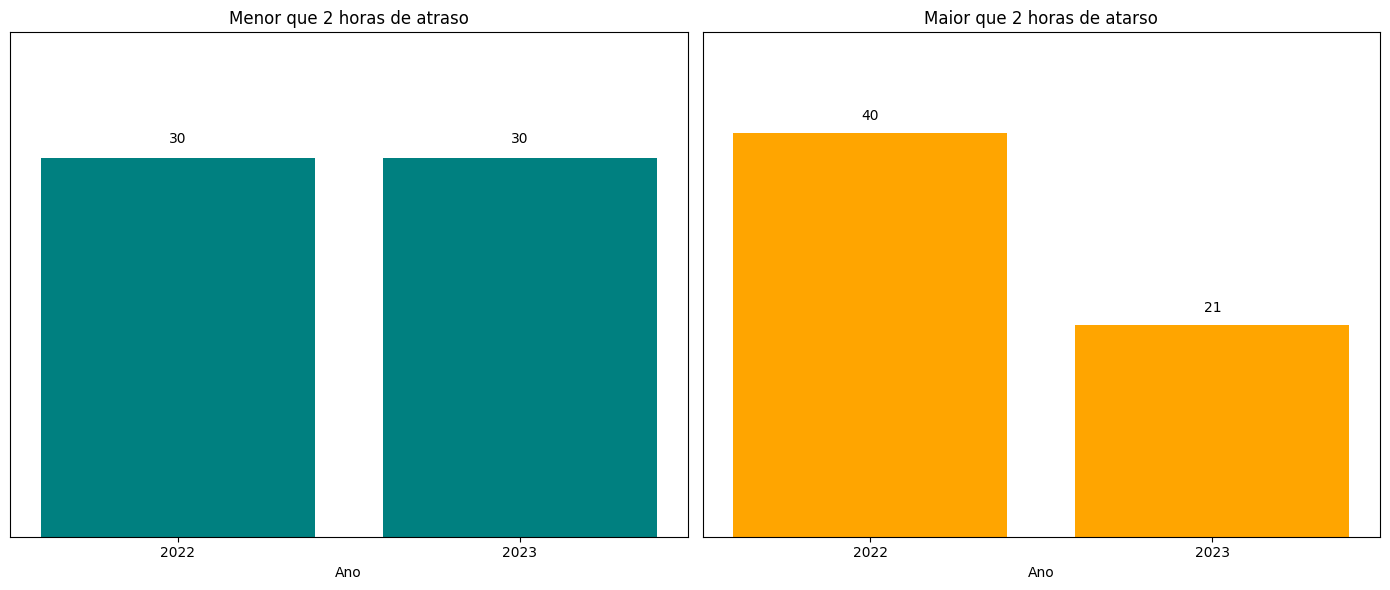

In [46]:
# Importando biblioteca para criar gráfico
import matplotlib.pyplot as plt

# Valores
x = [2022, 2023]  # Anos
y1 = [30, 30]  # Quantidade ano 2022
y2 = [40, 21]  # Quantidade ano 2023

# Criando os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Quantidade de cada ano
ax1.bar(x, y1, color='teal')
ax1.set_title('Menor que 2 horas de atraso')
ax1.set_xlabel('Ano')
ax1.grid(axis='y', linestyle='--')
ax1.set_ylim(0, max(y1) + 10)  # Ajustando o limite superior do eixo y
ax1.set_xticks(x)  # Garantir que os anos sejam mostrados corretamente
ax1.set_yticks([]) 

# Adicionar os valores nas barras do primeiro gráfico
for i in range(len(x)):
    ax1.text(x[i], y1[i] + 1, str(y1[i]), ha='center', va='bottom')

# Total de vendas por ano
ax2.bar(x, y2, color='orange')
ax2.set_title('Maior que 2 horas de atarso')
ax2.set_xlabel('Ano')
ax2.grid(axis='y', linestyle='--')
ax2.set_ylim(0, max(y2) + 10)  # Ajustando o limite superior do eixo y
ax2.set_xticks(x)  # Garantir que os anos sejam mostrados corretamente
ax2.set_yticks([])

# Adicionar os valores nas barras do segundo gráfico
for i in range(len(x)):
    ax2.text(x[i], y2[i] + 1, str(y2[i]), ha='center', va='bottom')

# Ajustar o layout
plt.tight_layout();

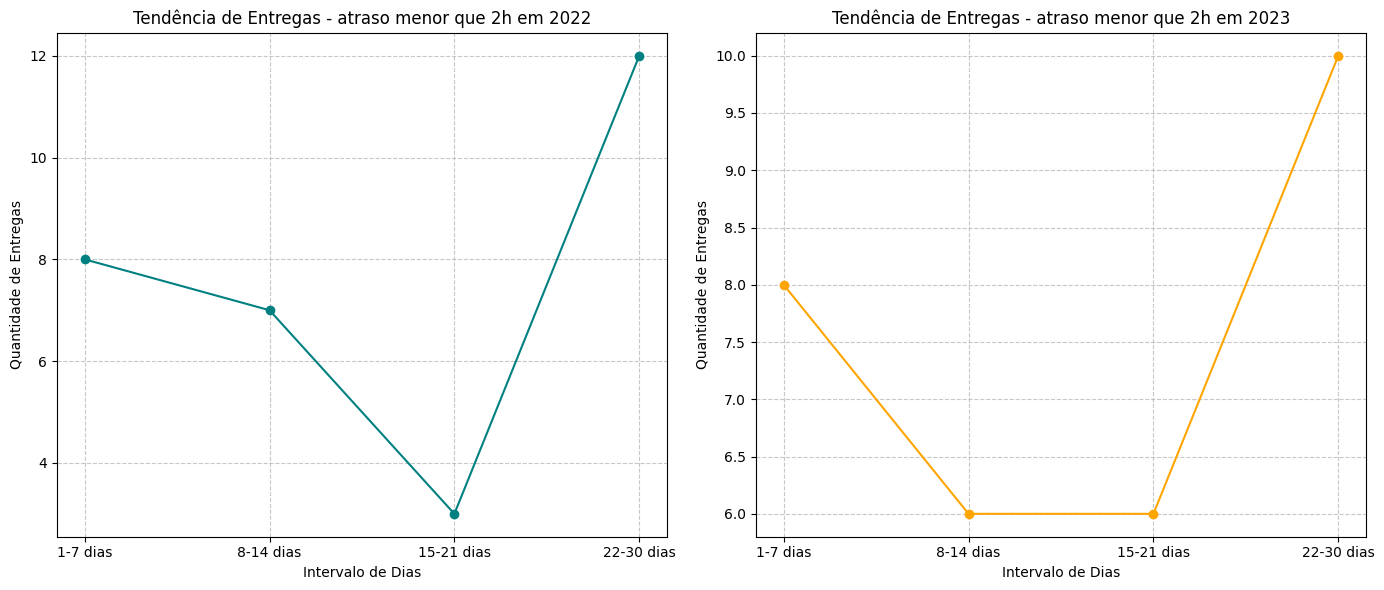

In [47]:
# Importando biblioteca para criar gráficos
import matplotlib.pyplot as plt

# Dados
x = ['1-7 dias', '8-14 dias', '15-21 dias', '22-30 dias']
y1 = [menor_7_2022, menor_8_a_14_2022, menor_15_a_21_2022, menor_22_a_31_2022]
y2 = [menor_7_2023, menor_8_a_14_2023, menor_15_a_21_2023, menor_22_a_31_2023]

# Criando os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de linha - Ano 2022
ax1.plot(x, y1, marker='o', linestyle='-', color='teal')
ax1.set_title('Tendência de Entregas - atraso menor que 2h em 2022')
ax1.set_xlabel('Intervalo de Dias')
ax1.set_ylabel('Quantidade de Entregas')
ax1.grid(linestyle='--', alpha=0.7)


# Gráfico de linha - Ano 2023
ax2.plot(x, y2, marker='o', linestyle='-', color='orange')
ax2.set_title('Tendência de Entregas - atraso menor que 2h em 2023')
ax2.set_xlabel('Intervalo de Dias')
ax2.set_ylabel('Quantidade de Entregas')
ax2.grid(linestyle='--', alpha=0.7)

# Ajustar o layout
plt.tight_layout();

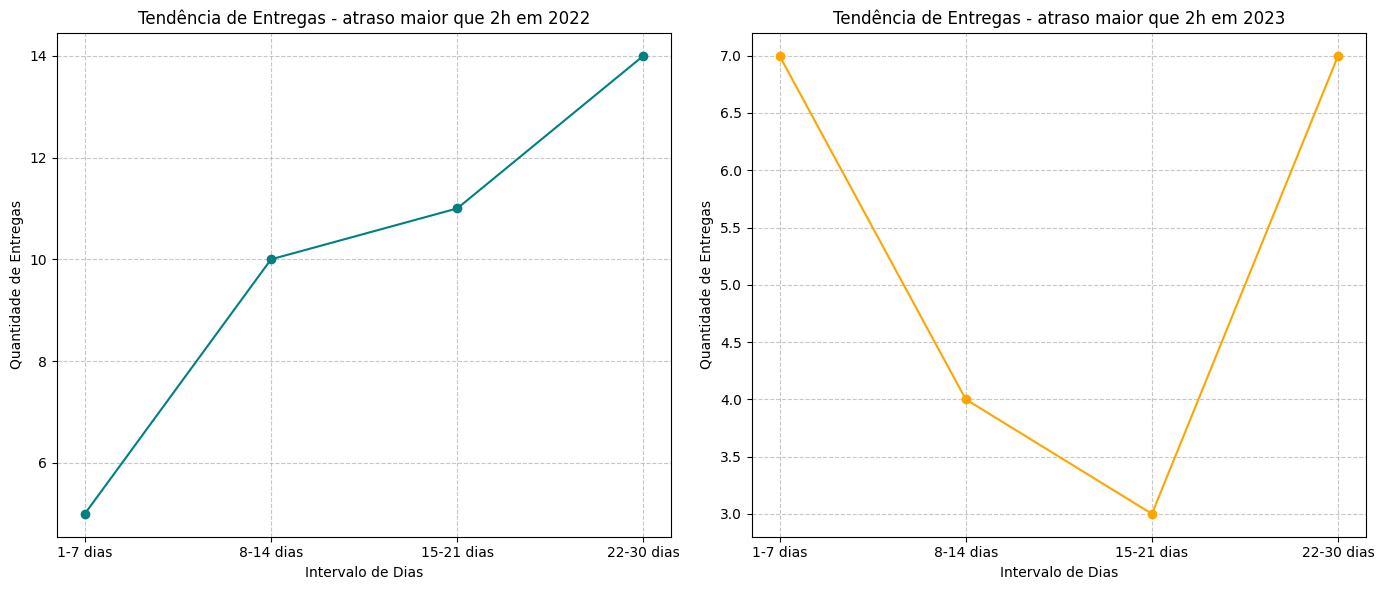

In [48]:
# Importando biblioteca para criar gráficos
import matplotlib.pyplot as plt

# Dados
x = ['1-7 dias', '8-14 dias', '15-21 dias', '22-30 dias']
y1 = [maior_7_2022, maior_8_a_14_2022, maior_15_a_21_2022, maior_22_a_31_2022]
y2 = [maior_7_2023, maior_dia_8_a_14_2023, maior_dia_15_a_21_2023, maior_dia_22_a_31_2023]

# Criando os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de linha - Ano 2022
ax1.plot(x, y1, marker='o', linestyle='-', color='teal')
ax1.set_title('Tendência de Entregas - atraso maior que 2h em 2022')
ax1.set_xlabel('Intervalo de Dias')
ax1.set_ylabel('Quantidade de Entregas')
ax1.grid(linestyle='--', alpha=0.7)


# Gráfico de linha - Ano 2023
ax2.plot(x, y2, marker='o', linestyle='-', color='orange')
ax2.set_title('Tendência de Entregas - atraso maior que 2h em 2023')
ax2.set_xlabel('Intervalo de Dias')
ax2.set_ylabel('Quantidade de Entregas')
ax2.grid(linestyle='--', alpha=0.7)

# Ajustar o layout
plt.tight_layout();

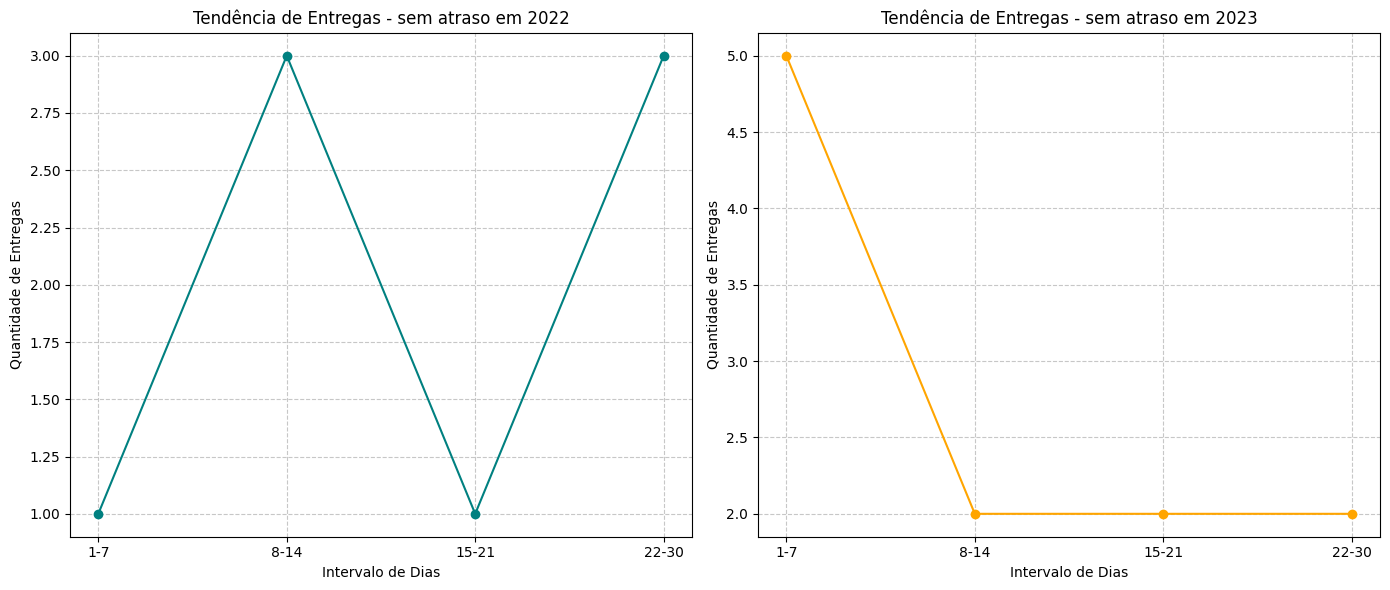

In [49]:
# Importando biblioteca para criar gráficos
import matplotlib.pyplot as plt

# Dados
x = ['1-7', '8-14', '15-21', '22-30']
y1 = [sem_7_2022, sem_8_a_14_2022, sem_15_a_21_2022, sem_22_a_31_2022]
y2 = [sem_7_2023, sem_8_a_14_2023, sem_15_a_21_2023, sem_22_a_31_2023]

# Criando os gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de linha - Ano 2022
ax1.plot(x, y1, marker='o', linestyle='-', color='teal')
ax1.set_title('Tendência de Entregas - sem atraso em 2022')
ax1.set_xlabel('Intervalo de Dias')
ax1.set_ylabel('Quantidade de Entregas')
ax1.grid(linestyle='--', alpha=0.7)

# Gráfico de linha - Ano 2023
ax2.plot(x, y2, marker='o', linestyle='-', color='orange')
ax2.set_title('Tendência de Entregas - sem atraso em 2023')
ax2.set_xlabel('Intervalo de Dias')
ax2.set_ylabel('Quantidade de Entregas')
ax2.grid(linestyle='--', alpha=0.7)

# Ajustar o layout
plt.tight_layout();

In [50]:
# Verificando valores únicos
historico_entregas['Veiculo'].unique()

array(['Van', 'Caminhão', 'Moto'], dtype=object)

In [51]:
# Agrupar por tipo de veículo e calcular a média de tempo de entrega
tempo_medio_por_veiculo = historico_entregas.groupby('Veiculo')['Tempo_Entrega'].mean()

# Exibir resultados
print("Tempo médio de entrega por veículo:")
print(tempo_medio_por_veiculo)

Tempo médio de entrega por veículo:
Veiculo
Caminhão    1.405405
Moto        1.440000
Van         1.552632
Name: Tempo_Entrega, dtype: float64


In [52]:
# Filtrar os dados e contar os valores
resposta = historico_entregas.query('Atraso_h == 0')['Veiculo'].value_counts()

# Transformando a resposta em um dicionário
resposta_dict = resposta.to_dict()

# Exibindo o resultado
print(resposta_dict)

{'Van': 8, 'Moto': 8, 'Caminhão': 3}


In [53]:
# Filtrar os dados e contar os valores
resposta = historico_entregas.query('Atraso_h == 1')['Veiculo'].value_counts()

# Transformando a resposta em um dicionário
resposta_dict = resposta.to_dict()

# Exibindo o resultado
print(resposta_dict)

{'Caminhão': 10, 'Van': 8, 'Moto': 2}


In [54]:
# Filtrar os dados e contar os valores
resposta = historico_entregas.query('Atraso_h == 2')['Veiculo'].value_counts()

# Transformando a resposta em um dicionário
resposta_dict = resposta.to_dict()

# Exibindo o resultado
print(resposta_dict)

{'Van': 7, 'Caminhão': 7, 'Moto': 7}


In [55]:
# Filtrar os dados e contar os valores
resposta = historico_entregas.query('Atraso_h == 3')['Veiculo'].value_counts()

# Transformando a resposta em um dicionário
resposta_dict = resposta.to_dict()

# Exibindo o resultado
print(resposta_dict)

{'Caminhão': 10, 'Van': 6, 'Moto': 5}


In [56]:
# Filtrar os dados e contar os valores
resposta = historico_entregas.query('Atraso_h == 4')['Veiculo'].value_counts()

# Transformando a resposta em um dicionário
resposta_dict = resposta.to_dict()

# Exibindo o resultado
print(resposta_dict)

{'Van': 9, 'Caminhão': 7, 'Moto': 3}


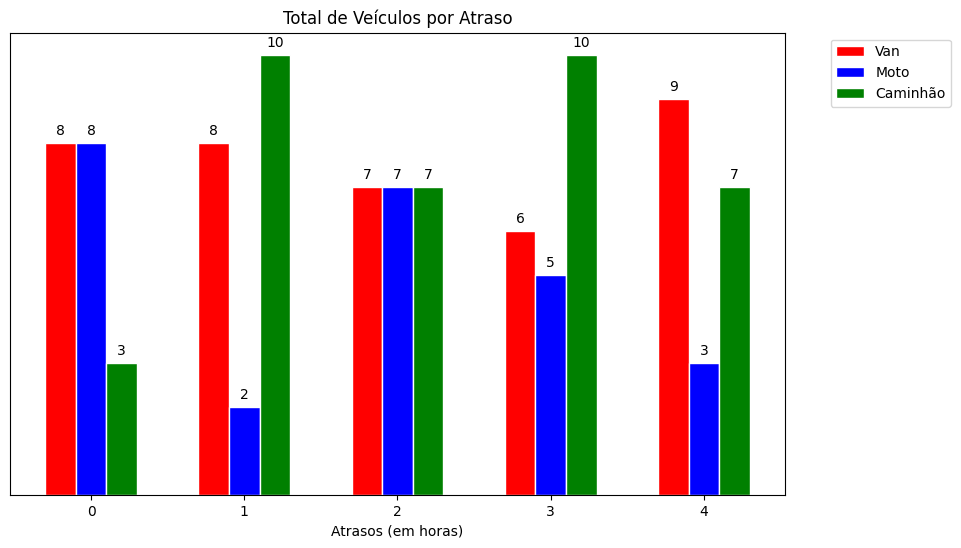

In [57]:
# Importando biblioteca para criar gráfico
import matplotlib.pyplot as plt

# Dados
atrasos = ['0', '1', '2', '3', '4']
veiculos = ['Van', 'Moto', 'Caminhão']
dados = {
    '0': {'Van': 8, 'Moto': 8, 'Caminhão': 3},
    '1': {'Caminhão': 10, 'Van': 8, 'Moto': 2},
    '2': {'Van': 7, 'Caminhão': 7, 'Moto': 7},
    '3': {'Caminhão': 10, 'Van': 6, 'Moto': 5},
    '4': {'Van': 9, 'Caminhão': 7, 'Moto': 3}
}

cores = {'Van': 'red', 'Moto': 'blue', 'Caminhão': 'green'}

# Configuração do gráfico
plt.figure(figsize=(10, 6))
barWidth = 0.2  # Largura das barras
r = range(len(atrasos))

# Criando barras empilhadas
for idx, veiculo in enumerate(veiculos):
    # Valores do veículo atual
    valores_veiculo = [dados[cat][veiculo] for cat in atrasos]
    # Posicionamento das barras
    posicao = [x + idx * barWidth for x in r]
    # Criando as barras
    plt.bar(posicao, valores_veiculo, color=cores[veiculo], edgecolor='white', width=barWidth, label=veiculo)
    # Adicionando rótulos
    for j, valor in enumerate(valores_veiculo):
        plt.text(posicao[j], valor + 0.1, str(valor), ha='center', va='bottom')

# Título e configurações
plt.title('Total de Veículos por Atraso')
plt.xlabel('Atrasos (em horas)')
plt.xticks([x + barWidth for x in r], atrasos)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.yticks([])
plt.show()


In [58]:
# Verificando valores únicos
historico_entregas['Motorista_ID'].nunique()

10

In [59]:
# Filtrando sem atrasos por veículo e motorista
atraso_0 = historico_entregas.query('Atraso_h == 0')[['Veiculo','Motorista_ID']].value_counts()

# Exibir resultado
atraso_0

Veiculo   Motorista_ID
Van       205             3
Moto      202             2
Caminhão  201             1
          203             1
          207             1
Moto      201             1
          204             1
          205             1
          206             1
          207             1
          209             1
Van       201             1
          203             1
          204             1
          206             1
          207             1
Name: count, dtype: int64

In [60]:
# Filtrando uma hora de atraso
atraso_1h = historico_entregas.query('Atraso_h == 1')[['Veiculo','Motorista_ID']].value_counts()

# Exibir resultado
atraso_1h

Veiculo   Motorista_ID
Van       209             3
Caminhão  203             2
          208             2
          201             1
          202             1
          205             1
          206             1
          207             1
          209             1
Moto      203             1
          206             1
Van       201             1
          202             1
          204             1
          206             1
          210             1
Name: count, dtype: int64

In [61]:
# Filtrando duas horas de atrasos
atraso_2h = historico_entregas.query('Atraso_h == 2')[['Veiculo','Motorista_ID']].value_counts()

# Exibir resultado
atraso_2h

Veiculo   Motorista_ID
Moto      208             2
Van       208             2
Moto      205             2
Caminhão  201             1
Van       206             1
          205             1
          203             1
          202             1
Moto      210             1
          207             1
Caminhão  203             1
Moto      203             1
Caminhão  210             1
          209             1
          208             1
          207             1
          205             1
Van       209             1
Name: count, dtype: int64

In [62]:
# Filtrando três horas de atraso
atraso_3h = historico_entregas.query('Atraso_h == 3')[['Veiculo','Motorista_ID']].value_counts()

# Exibir resultado
atraso_3h

Veiculo   Motorista_ID
Caminhão  202             2
          203             2
          207             2
Moto      201             2
          210             2
Van       201             2
Caminhão  201             1
          206             1
          208             1
          210             1
Moto      208             1
Van       203             1
          205             1
          208             1
          209             1
Name: count, dtype: int64

In [63]:
# Filtrando quatro hora de atraso 
atraso_4h = historico_entregas.query('Atraso_h == 4')[['Veiculo','Motorista_ID']].value_counts()

# Exibir resultado
atraso_4h

Veiculo   Motorista_ID
Caminhão  204             4
Moto      204             2
Van       201             2
          205             2
          206             2
          208             2
Caminhão  201             1
          206             1
          210             1
Moto      207             1
Van       203             1
Name: count, dtype: int64

In [68]:
# Contagem de cada hora de atraso
print(f'Quantidade de uma hora de atraso = {atraso_1h.sum()}')
print(f'Quantidade de duas horas de atrasos = {atraso_2h.sum()}')
print(f'Quantidade de três horas de atrasos = {atraso_3h.sum()}')
print(f'Quantidade de quatro horas = {atraso_4h.sum()}')
print(f'Quantidade: sem atrasos = {atraso_0.sum()}')

Quantidade de uma hora de atraso = 20
Quantidade de duas horas de atrasos = 21
Quantidade de três horas de atrasos = 21
Quantidade de quatro horas = 19
Quantidade: sem atrasos = 19


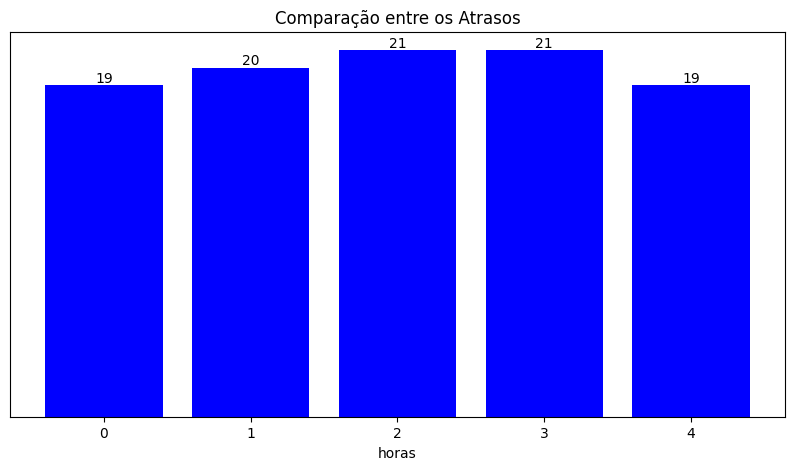

In [69]:
# Importando biblioteca para criar gráfico
import matplotlib.pyplot as plt

# Dados
x = ['0', '1', '2', '3','4']  # horas de atrasos
y = [19, 20, 21, 21,19]  # Quantidade de atrasos

# Configuração do gráfico
plt.figure(figsize=(10, 5))
plt.bar(range(len(x)), y, color='blue')  # Usando o range do comprimento de x para as posições

# Título e rótulos dos eixos
plt.title('Comparação entre os Atrasos')
plt.xlabel('horas')
plt.yticks([])

# Adicionar rótulos personalizados no eixo x
plt.xticks(ticks=range(len(x)), labels=x)

# Adicionar valores sobre as barras
for i in range(len(y)):
    plt.text(i, y[i], str(y[i]), ha='center', va='bottom', fontsize=10)

# Mostrar o gráfico
plt.show()


In [70]:
# Agrupar por Motorista_ID e contar o número de ocorrências de atrasos
motorista_atrasos = historico_entregas.groupby('Motorista_ID')['Atraso_h'].count()

# Encontrar o motorista com o maior número de atrasos
motorista_mais_atrasos_id = motorista_atrasos.idxmax()
maior_quantidade = motorista_atrasos.max()

# Obter o nome do motorista e o veículo associado
motorista_mais_atrasos = motorista[motorista['Motorista_ID'] == motorista_mais_atrasos_id]['Nome'].values[0]
veiculo_associado = historico_entregas[historico_entregas['Motorista_ID'] == motorista_mais_atrasos_id]['Veiculo'].iloc[0]

# Exibir resultado
print(f"Motorista com mais atrasos em quantidade: {motorista_mais_atrasos} (Veículo: {veiculo_associado})")
print(f"Número de atrasos: {maior_quantidade}")


Motorista com mais atrasos em quantidade: Alejandro Roberson (Veículo: Caminhão)
Número de atrasos: 14


In [71]:
# Encontrar o valor máximo de atraso
maior_atraso = historico_entregas['Atraso_h'].max()

# Filtrar motoristas com o mesmo valor de atraso
motoristas_com_maior_atraso = motorista[historico_entregas['Motorista_ID'] == maior_atraso]

# Verificar se existe mais de um motorista com o maior atraso
if len(motoristas_com_maior_atraso) > 1:
    print("Existem motoristas com o mesmo valor de maior atraso:")
    print(motoristas_com_maior_atraso[['Motorista_ID', 'Veiculo', 'Atraso_h']])
else:
    print("Somente um motorista tem o maior atraso.")


Somente um motorista tem o maior atraso.


C:\Users\Usuário\AppData\Local\Temp\ipykernel_12796\3739250332.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  motoristas_com_maior_atraso = motorista[historico_entregas['Motorista_ID'] == maior_atraso]


In [72]:
# Filtrar informações
motorista_especifico = motorista[motorista['Nome'] == "Alejandro Roberson"]

# Exibir resultado
print(motorista_especifico[['Motorista_ID', 'Nome','Experiencia_anos', 'Avaliacao']])

   Motorista_ID                Nome  Experiencia_anos  Avaliacao
0           201  Alejandro Roberson                 9        3.7


In [73]:
# Encontrar o valor máximo de atraso
maior_atraso = historico_entregas['Atraso_h'].max()

# Filtrar motoristas com o mesmo valor de atraso
motoristas_com_maior_atraso = historico_entregas[historico_entregas['Atraso_h'] == maior_atraso]

# Verificar se existe mais de um motorista com o maior atraso
if len(motoristas_com_maior_atraso) > 1:
    print("Existem motoristas com o mesmo valor de maior atraso:")
    print(motoristas_com_maior_atraso[['Motorista_ID', 'Veiculo', 'Atraso_h']])
else:
    print("Somente um motorista tem o maior atraso.")

Existem motoristas com o mesmo valor de maior atraso:
    Motorista_ID   Veiculo  Atraso_h
4            204      Moto         4
8            204  Caminhão         4
10           201  Caminhão         4
12           206  Caminhão         4
13           205       Van         4
14           204  Caminhão         4
17           206       Van         4
27           204  Caminhão         4
35           207      Moto         4
45           203       Van         4
46           201       Van         4
53           205       Van         4
57           210  Caminhão         4
58           204      Moto         4
64           208       Van         4
66           208       Van         4
71           201       Van         4
92           204  Caminhão         4
95           206       Van         4


In [74]:
# Filtrar motoristas com o maior atraso
motoristas_com_maior_atraso = historico_entregas[historico_entregas['Atraso_h'] == maior_atraso]

# Contar a quantidade de vezes que cada Motorista_ID aparece
quantidade_por_motorista = motoristas_com_maior_atraso['Motorista_ID'].value_counts()

# Exibir o resultado
print('Quatidade de atrasos por ID')
print(quantidade_por_motorista)

Quatidade de atrasos por ID
Motorista_ID
204    6
201    3
206    3
205    2
208    2
207    1
203    1
210    1
Name: count, dtype: int64


In [75]:
# Exibir o maior atraso e o motorista 
indice_maior_atraso = motoristas_com_maior_atraso['Atraso_h'].idxmax()
motorista_maior_atraso = historico_entregas.loc[indice_maior_atraso, 'Veiculo']
id_maior_atraso = historico_entregas.loc[indice_maior_atraso, 'Motorista_ID']
quantidade_atraso = historico_entregas.loc[indice_maior_atraso, 'Atraso_h']

# Procurar o nome no DataFrame motorista
nome_maior_atraso = motorista.loc[motorista['Motorista_ID'] == id_maior_atraso, 'Nome'].values[0]

# Exibir os resultados
print('Maior atraso individual:')
print(f"Veículo: {motorista_maior_atraso}")
print(f"ID associado: {id_maior_atraso}")
print(f"Nome do motorista: {nome_maior_atraso}")
print(f"Atraso: {quantidade_atraso} horas")

Hora em atraso:
Veículo: Moto
ID associado: 204
Nome do motorista: Samuel Roberts
Atraso: 4 horas


In [76]:
# Filtrar o motorista com 'ID 204'
motorista_especifico = motorista[motorista['Motorista_ID'] == 204]

# Exibir as informações do motorista, incluindo avaliação (se houver uma coluna específica para isso)
print(motorista_especifico[['Motorista_ID', 'Nome', 'Experiencia_anos', 'Avaliacao']])

   Motorista_ID            Nome  Experiencia_anos  Avaliacao
3           204  Samuel Roberts                 5        3.9


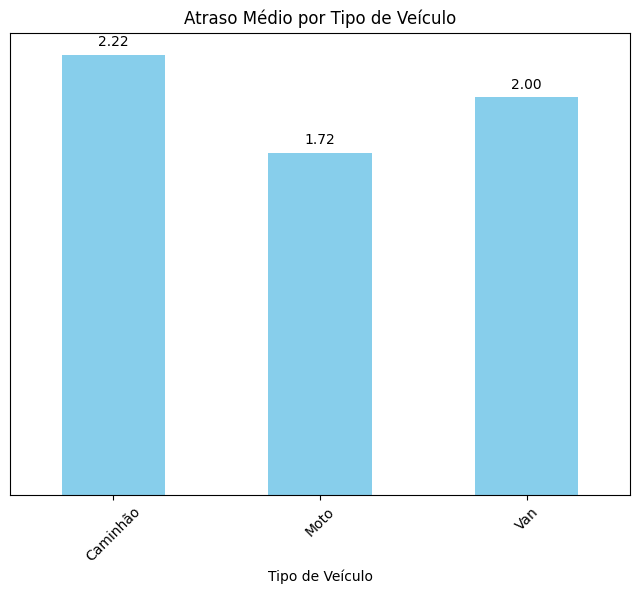

In [77]:
# Agrupar atrasos por veículo
atrasos_por_veiculo = historico_entregas.groupby('Veiculo')['Atraso_h'].mean()

# Gráfico de barras
ax = atrasos_por_veiculo.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title("Atraso Médio por Tipo de Veículo")
plt.xlabel("Tipo de Veículo")
plt.xticks(rotation=45)
plt.yticks([])

# Adicionar valores em cima das barras
for i, valor in enumerate(atrasos_por_veiculo):
    plt.text(i, valor + 0.03, f'{valor:.2f}', ha='center', va='bottom', fontsize=10)

plt.show()

In [78]:
# Copiando base de dado para preservando o original
copia_historico_entrega = historico_entregas.copy()

In [79]:
# Tranformar em dataframe
novo_dataframe = pedidos[['Local_Entrega']].copy()

# Exibir resultado
print(novo_dataframe.head(3))

         Local_Entrega
0  Belo Horizonte - MG
1  Rio de Janeiro - RJ
2  Rio de Janeiro - RJ


In [80]:
# Abrir a base de dados
df_concatenar = pd.concat([copia_historico_entrega, novo_dataframe], axis =1)

# Exibir 2 linhas
df_concatenar.head(2)

,Entrega_ID,Pedido_ID,Data_Coleta,Data_Entrega,Veiculo,Motorista_ID,Atraso_h,Nao_Padrao,Tempo_Entrega,Ano,Mes,Dia,Local_Entrega
0,501,1,2022-11-01,2022-11-02,Van,205,0,True,1.0,2022,11,2,Belo Horizonte - MG
1,502,2,2022-11-02,2022-11-03,Caminhão,206,3,True,1.0,2022,11,3,Rio de Janeiro - RJ


In [81]:
# Criar um dicionário com informações de 'Origem_Local' e 'Tempo_Estimado' (base de dado 'taxa_entraga')
tempo_estimado_por_estado = {
    'São Paulo - SP': 1,  # São Paulo: 12 horas
    'Rio de Janeiro - RJ': 6,  # Rio de Janeiro: 24 horas
    'Belo Horizonte - MG': 8  # Minas Gerais: 18 horas
}

In [82]:
# Criar uma coluna e mapear
df_concatenar['Tempo_Estimado'] = df_concatenar['Local_Entrega'].map(tempo_estimado_por_estado)

# Exibir 2 linhas
df_concatenar.head(2)

,Entrega_ID,Pedido_ID,Data_Coleta,Data_Entrega,Veiculo,Motorista_ID,Atraso_h,Nao_Padrao,Tempo_Entrega,Ano,Mes,Dia,Local_Entrega,Tempo_Estimado
0,501,1,2022-11-01,2022-11-02,Van,205,0,True,1.0,2022,11,2,Belo Horizonte - MG,8
1,502,2,2022-11-02,2022-11-03,Caminhão,206,3,True,1.0,2022,11,3,Rio de Janeiro - RJ,6


In [83]:
# Criar coluna 
df_concatenar['Entrega_No_Tempo'] = df_concatenar['Atraso_h'] <= df_concatenar['Tempo_Estimado']

# Cáculo da média tempo de entrega por cidade
desempenho_cidade = df_concatenar.groupby('Local_Entrega')['Entrega_No_Tempo'].mean()

# Exibir resultado
print(desempenho_cidade)

Local_Entrega
Belo Horizonte - MG    1.000000
Rio de Janeiro - RJ    1.000000
São Paulo - SP         0.354839
Name: Entrega_No_Tempo, dtype: float64


In [84]:
# Criar coluna 
df_concatenar['Atraso_Real'] = df_concatenar['Atraso_h'] - df_concatenar['Tempo_Estimado']

# Cáculo da média atraso real por cidade 
atraso_medio_cidade = df_concatenar.groupby('Local_Entrega')['Atraso_Real'].mean()

# Exibir resultado
print(atraso_medio_cidade)

Local_Entrega
Belo Horizonte - MG   -6.161290
Rio de Janeiro - RJ   -3.947368
São Paulo - SP         1.129032
Name: Atraso_Real, dtype: float64


In [85]:
# Criar coluna
df_concatenar['Atraso'] = df_concatenar['Atraso_h'] > df_concatenar['Tempo_Estimado']

# Cáculo da média de atrasos por cidade
percentual_atraso_cidade = df_concatenar.groupby('Local_Entrega')['Atraso'].mean() * 100

# Exibir resultado
print(percentual_atraso_cidade)

Local_Entrega
Belo Horizonte - MG     0.000000
Rio de Janeiro - RJ     0.000000
São Paulo - SP         64.516129
Name: Atraso, dtype: float64


In [86]:
# Agrupar por cidade e calcular a média
media_atraso_cidade = df_concatenar.groupby('Local_Entrega')['Atraso_h'].mean()

# Exibir resultado
print(media_atraso_cidade)

Local_Entrega
Belo Horizonte - MG    1.838710
Rio de Janeiro - RJ    2.052632
São Paulo - SP         2.129032
Name: Atraso_h, dtype: float64


In [87]:
# Dados
dados = {
    'Estado': ['São Paulo - SP', 'Rio de Janeiro - RJ', 'Belo Horizonte - MG'],
    'Taxa_Base': [10, 50, 70],
    'Taxa_Km': [0.50, 0.70, 0.75],  
    'Taxa_volume': [2.0, 3.0, 3.5],
    'Distancia': [20, 450, 580] 
}

# Criando o DataFrame
df2 = pd.DataFrame(dados)

# Exibir resultado
print(df2)

                Estado  Taxa_Base  Taxa_Km  Taxa_volume  Distancia
0       São Paulo - SP         10     0.50          2.0         20
1  Rio de Janeiro - RJ         50     0.70          3.0        450
2  Belo Horizonte - MG         70     0.75          3.5        580


In [88]:
# Copiando df para preservando o original
copia_pedidos = pedidos.copy()

In [89]:
# Fazendo o mapeamento pelo merge
df_completo = pd.merge(
    copia_pedidos,
    df2,
    left_on='Local_Entrega',  # Coluna do DataFrame pedidos
    right_on='Estado',        # Coluna do DataFrame dados
    how='left'                # Faz a união pela correspondência
)

# Exibindo 2 linhas
df_completo.head(2)

,Pedido_ID,Cliente_ID,Data_Pedido,Valor_Pedido,Local_Entrega,Volume (m³),Peso (kg),Status,Estado,Taxa_Base,Taxa_Km,Taxa_volume,Distancia
0,1,45,2024-11-01,152.57,Belo Horizonte - MG,0.13,19.82,Entregue,Belo Horizonte - MG,70,0.75,3.5,580
1,2,18,2024-11-02,242.20,Rio de Janeiro - RJ,0.13,8.84,Em Trânsito,Rio de Janeiro - RJ,50,0.70,3.0,450


In [90]:
# Cálculo do custo total por entrega
Custo_Total = df_completo['Taxa_Base'] + (df_completo['Taxa_Km'] * df_completo['Distancia']) + df_completo['Taxa_volume'] * df_completo['Volume (m³)']

# Exibir resultado
Custo_Total 

0     505.455
1     365.390
2     367.520
3     366.260
4     365.630
       ...   
95    367.460
96     20.700
97    365.780
98    367.340
99    367.490
Length: 100, dtype: float64

In [91]:
# Adicionar 'Custo_Total' na tabela 
df_completo['Custo_Total'] = Custo_Total

In [92]:
# Correlação
correlacoes = df_completo[['Custo_Total', 'Peso (kg)', 'Volume (m³)', 'Distancia']].corr()

# Exibir resultado
print("\nCorrelação entre variáveis:\n", correlacoes)


Correlação entre variáveis:
              Custo_Total  Peso (kg)  Volume (m³)  Distancia
Custo_Total     1.000000   0.094344     0.023748   0.997947
Peso (kg)       0.094344   1.000000     0.166555   0.091940
Volume (m³)     0.023748   0.166555     1.000000   0.022801
Distancia       0.997947   0.091940     0.022801   1.000000


In [93]:
# Importar biblioteca
from sklearn.linear_model import LinearRegression

# Modelagem com Regressão Linear
X = df_completo[['Peso (kg)', 'Volume (m³)', 'Distancia']]
y = df_completo['Custo_Total']

modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [94]:
# Importar biblioteca
from sklearn.metrics import r2_score

# Predição e avaliação
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)

# Exibir resultado
print(f"R² do modelo: {r2:.2f}")

R² do modelo: 1.00


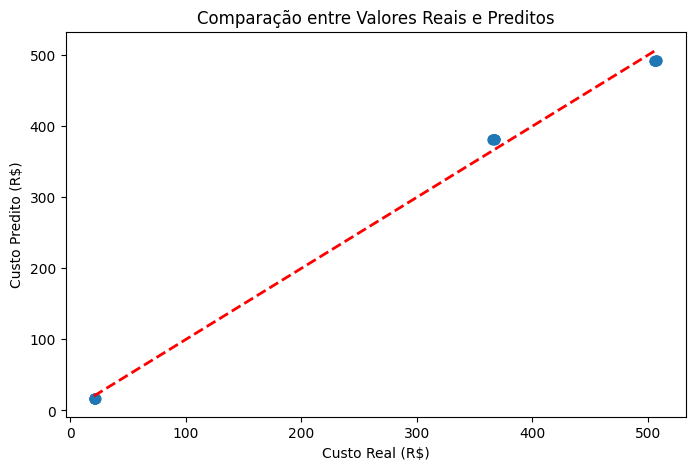

In [95]:
# Comparação real x predito
plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Comparação entre Valores Reais e Preditos')
plt.xlabel('Custo Real (R$)')
plt.ylabel('Custo Predito (R$)')
plt.show()

In [96]:
# Criar um dicionário
mapa_status = pedidos.set_index('Pedido_ID')['Status'].to_dict()

# Criar coluna e mapear
historico_entregas['status'] = historico_entregas['Pedido_ID'].map(mapa_status)

# Exibir resultado
print(historico_entregas[['Pedido_ID', 'status']].head(2))

   Pedido_ID       status
0          1     Entregue
1          2  Em Trânsito


In [97]:
# Verificar valores únicos
historico_entregas['status'].unique()

array(['Entregue', 'Em Trânsito', 'Cancelado'], dtype=object)

In [98]:
# Quantidade de cada status
print(f'Quantidade de cada {historico_entregas.groupby(['status']).size()}')

Quantidade de cada status
Cancelado      24
Em Trânsito    33
Entregue       43
dtype: int64


In [99]:
# Filtro: atraso e status entregue
status_entregue = historico_entregas.query('Atraso_h >= 2 and status == "Entregue"')[['Veiculo','status']].value_counts()

print('Quantidade entregue por veículo') # Exibir mensagem

# Exibir resultado
status_entregue

Quantidade entregue por veículo


Veiculo   status  
Caminhão  Entregue    11
Van       Entregue     8
Moto      Entregue     7
Name: count, dtype: int64

In [100]:
# Transformando em um dicionário
dict_entregue = status_entregue.to_dict()

# Exibindo resultado
print(dict_entregue)

{('Caminhão', 'Entregue'): 11, ('Van', 'Entregue'): 8, ('Moto', 'Entregue'): 7}


In [101]:
# Criar novo dicionário com apenas o primeiro valor da chave (sem excluir as entradas)
entregue = {key[0]: value for key, value in dict_entregue.items()}

# Exibir resultado
print(entregue)

{'Caminhão': 11, 'Van': 8, 'Moto': 7}


In [102]:
# Filtro atraso e status em trânsito
status_emTransito=historico_entregas.query('Atraso_h >= 2 and status == "Em Trânsito"')[['Veiculo','status']].value_counts()

print('Quantidade em trânsito por veículo') # Exibir mensagem

# Exibir resultado
status_emTransito

Quantidade em trânsito por veículo


Veiculo   status     
Caminhão  Em Trânsito    8
Van       Em Trânsito    8
Moto      Em Trânsito    7
Name: count, dtype: int64

In [103]:
# Transformando em um dicionário
dict_emTransito = status_emTransito.to_dict()

# Exibindo resultado
print(dict_emTransito)

{('Caminhão', 'Em Trânsito'): 8, ('Van', 'Em Trânsito'): 8, ('Moto', 'Em Trânsito'): 7}


In [104]:
# Criar novo dicionário com apenas o primeiro valor da chave (sem excluir as entradas)
emTransito = {key[0]: value for key, value in dict_emTransito.items()}

# Exibir resultado
print(emTransito)

{'Caminhão': 8, 'Van': 8, 'Moto': 7}


In [105]:
# Filtro atraso e status cancelado
status_cancelado = historico_entregas.query('Atraso_h >= 2 and status == "Cancelado"')[['Veiculo','status']].value_counts()

print('Quantidade cancelado por veículo') # Exibir mensagem

# Exibir resultado
status_cancelado

Quantidade cancelado por veículo


Veiculo   status   
Van       Cancelado    6
Caminhão  Cancelado    5
Moto      Cancelado    1
Name: count, dtype: int64

In [106]:
# Transformando em um dicionário
dict_cancelado = status_cancelado.to_dict()

# Exibindo o resultado
print(dict_cancelado)

{('Van', 'Cancelado'): 6, ('Caminhão', 'Cancelado'): 5, ('Moto', 'Cancelado'): 1}


In [107]:
# Criar novo dicionário com apenas o primeiro valor da chave (sem excluir as entradas)
cancelado = {key[0]: value for key, value in dict_cancelado.items()}

# Exibir o resultado
print(cancelado)

{'Van': 6, 'Caminhão': 5, 'Moto': 1}


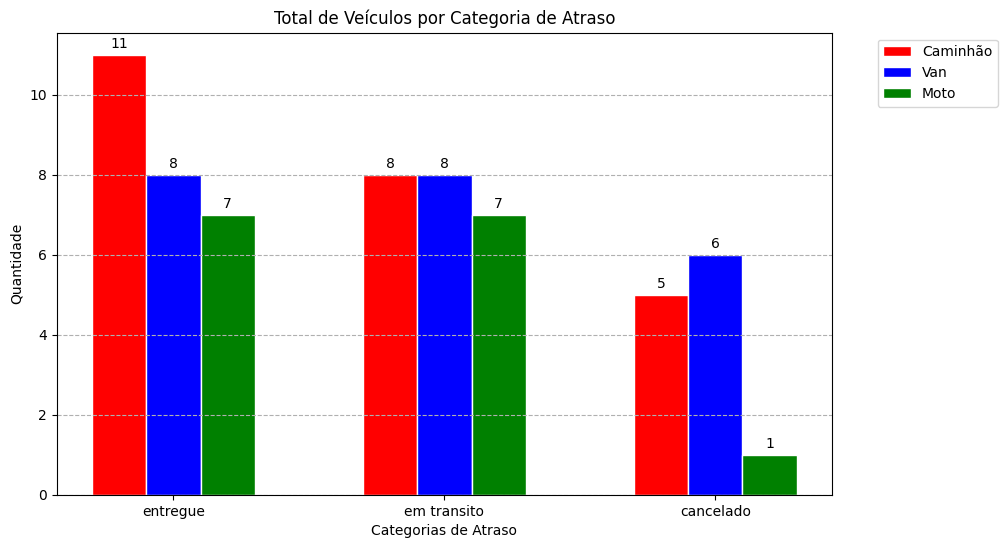

In [108]:
# Importando biblioteca para criar gráfico
import matplotlib.pyplot as plt    

# Dados
atrasos = ['entregue', 'em transito', 'cancelado']
veiculos = ['Caminhão', 'Van', 'Moto']
dados = {
    'entregue': {'Caminhão': 11, 'Van': 8, 'Moto': 7},
    'em transito': {'Caminhão': 8, 'Van': 8, 'Moto': 7},
    'cancelado': {'Van': 6, 'Caminhão': 5, 'Moto': 1}
}
cores = {'entregue': 'red', 'em transito': 'blue', 'cancelado': 'green'}

# Configuração do gráfico
plt.figure(figsize=(10, 6))
barWidth = 0.2  # Largura das barras
r = range(len(atrasos))

# Criando barras empilhadas
for idx, veiculo in enumerate(veiculos):
    # Valores do veículo atual
    valores_veiculo = [dados[cat][veiculo] for cat in atrasos]
    # Posicionamento das barras
    posicao = [x + idx * barWidth for x in r]
    # Criando as barras
    plt.bar(posicao, valores_veiculo, color=cores[atrasos[idx % len(atrasos)]], 
            edgecolor='white', width=barWidth, label=veiculo)
    # Adicionando rótulos
    for j, valor in enumerate(valores_veiculo):
        plt.text(posicao[j], valor + 0.1, str(valor), ha='center', va='bottom')


# Título e configurações
plt.title('Total de Veículos por Categoria de Atraso')
plt.xlabel('Categorias de Atraso')
plt.ylabel('Quantidade')
plt.xticks([x + barWidth for x in r], atrasos)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.show()


In [109]:
# Analisando todas as colunas
motorista.columns

Index(['Motorista_ID', 'Nome', 'Experiencia_anos', 'Avaliacao'], dtype='object')

In [110]:
# Verificando valores únicos coluna 'Experiencia_anos'
experiencia = motorista['Experiencia_anos'].unique()

# Ordenando
experiencia.sort()

# Exibir resultado
experiencia

array([1, 2, 3, 5, 6, 7, 9], dtype=int64)

In [111]:
# Estatística da coluna 'Experiencia_anos'
motorista['Experiencia_anos'].describe()

count    10.000000
mean      4.700000
std       2.626785
min       1.000000
25%       2.250000
50%       5.000000
75%       6.750000
max       9.000000
Name: Experiencia_anos, dtype: float64

In [112]:
# Analisando avaliação
avaliacao = motorista['Avaliacao']

# Ordenando
avaliacao.sort_values()

0    3.7
5    3.7
2    3.8
8    3.8
3    3.9
6    4.0
1    4.2
9    4.2
7    4.6
4    4.8
Name: Avaliacao, dtype: float64

In [113]:
# Estatística da avaliação
motorista['Avaliacao'].describe()

count    10.000000
mean      4.070000
std       0.380205
min       3.700000
25%       3.800000
50%       3.950000
75%       4.200000
max       4.800000
Name: Avaliacao, dtype: float64

In [114]:
# Filtro pela média de experiência e avaliação 
motorista.query('Experiencia_anos >= 4.7 and Avaliacao >= 4.08')[['Motorista_ID', 'Nome','Experiencia_anos', 'Avaliacao']]

,Motorista_ID,Nome,Experiencia_anos,Avaliacao
4,205,Emma White,5,4.8
7,208,Emily Mcfarland,7,4.6


In [115]:
# 1. Calcular o atraso médio por motorista
atraso_medio = historico_entregas.groupby('Motorista_ID')['Atraso_h'].mean().reset_index()
atraso_medio.rename(columns={'Atraso_h': 'Atraso_Medio_h'}, inplace=True)

# 2. Combinar os dados de atraso médio com experiência e avaliação
desempenho_motoristas = atraso_medio.merge(motorista, on='Motorista_ID', how='left')

# 3. Exibir o resultado final
desempenho_motoristas

,Motorista_ID,Atraso_Medio_h,Nome,Experiencia_anos,Avaliacao
0,201,2.214286,Alejandro Roberson,9,3.7
1,202,1.428571,Brian Curtis,1,4.2
2,203,1.833333,Shawn Johnson,7,3.8
3,204,2.777778,Samuel Roberts,5,3.9
4,205,1.666667,Emma White,5,4.8
5,206,2.000000,Shelly Mcclain,2,3.7
6,207,1.666667,Daniel Rojas Jr.,3,4.0
7,208,2.416667,Emily Mcfarland,7,4.6
8,209,1.375000,Shelly Scott,6,3.8
9,210,2.571429,Jonathan Williams,2,4.2


In [116]:
# 1. Normalizar as métricas entre 0 e 1 (inversão para atrasos baixos serem melhores)
desempenho_motoristas['Atraso_Score'] = 1 - (desempenho_motoristas['Atraso_Medio_h'] / desempenho_motoristas['Atraso_Medio_h'].max())
desempenho_motoristas['Avaliacao_Score'] = desempenho_motoristas['Avaliacao'] / desempenho_motoristas['Avaliacao'].max()
desempenho_motoristas['Experiencia_Score'] = desempenho_motoristas['Experiencia_anos'] / desempenho_motoristas['Experiencia_anos'].max()

# 2. Atribuir pesos para cada métrica (ajuste conforme importância)
peso_atraso = 0.4
peso_avaliacao = 0.3
peso_experiencia = 0.3

# 3. Calcular a pontuação final
desempenho_motoristas['Pontuacao_Final'] = (
    desempenho_motoristas['Atraso_Score'] * peso_atraso +
    desempenho_motoristas['Avaliacao_Score'] * peso_avaliacao +
    desempenho_motoristas['Experiencia_Score'] * peso_experiencia
)

# 4. Ordenar os motoristas pelo ranking
ranking_motoristas = desempenho_motoristas.sort_values(by='Pontuacao_Final', ascending=False).reset_index(drop=True)

# Exibir o ranking final
ranking_motoristas[['Motorista_ID', 'Pontuacao_Final', 'Atraso_Medio_h', 'Avaliacao', 'Experiencia_anos']]

,Motorista_ID,Pontuacao_Final,Atraso_Medio_h,Avaliacao,Experiencia_anos
0,209,0.639500,1.375000,3.8,6
1,205,0.626667,1.666667,4.8,5
2,201,0.612393,2.214286,3.7,9
3,203,0.606833,1.833333,3.8,7
4,208,0.572833,2.416667,4.6,7
5,207,0.510000,1.666667,4.0,3
6,202,0.490119,1.428571,4.2,1
7,204,0.410417,2.777778,3.9,5
8,206,0.409917,2.000000,3.7,2
9,210,0.358881,2.571429,4.2,2


In [117]:
# Verificando valores únicos coluna 'Veiculo'
historico_entregas['Veiculo'].unique()

array(['Van', 'Caminhão', 'Moto'], dtype=object)

In [118]:
# Quantidade de entregas por 'Motorista_ID'
historico_entregas['Motorista_ID'].value_counts()

Motorista_ID
201    14
205    12
203    12
208    12
206    10
204     9
207     9
209     8
210     7
202     7
Name: count, dtype: int64

In [119]:
# Verificar todas as colunas
clientes.columns

Index(['Cliente_ID', 'Nome', 'Localizacao', 'Tipo_Cliente'], dtype='object')

In [120]:
# Agrupar por tipo de cliente e localização
resultado = clientes.groupby(['Tipo_Cliente', 'Localizacao']).size() # Quantidade de tipo de cliente
resultado

Tipo_Cliente     Localizacao        
Pessoa Física    Belo Horizonte - MG     7
                 Rio de Janeiro - RJ     4
                 São Paulo - SP          4
Pessoa Jurídica  Belo Horizonte - MG    13
                 Rio de Janeiro - RJ    11
                 São Paulo - SP         11
dtype: int64

In [121]:
# Criar um dicionário
avaliacao = motorista.set_index('Motorista_ID')['Avaliacao'].to_dict()

# Mapear as avaliações para a coluna 'avaliacao' no DataFrame historico_entregas
historico_entregas['avaliacao'] = historico_entregas['Motorista_ID'].map(avaliacao)

# Exibir resultado
print(historico_entregas[['Motorista_ID', 'avaliacao']].head(2))


   Motorista_ID  avaliacao
0           205        4.8
1           206        3.7


In [122]:
# Agrupar por Motorista_ID 
motorista_avaliacao = historico_entregas.groupby('Motorista_ID')['avaliacao'].unique()

# Exibir resultado
print(f'Avaliação por {motorista_avaliacao}')

Avaliação por Motorista_ID
201    [3.7]
202    [4.2]
203    [3.8]
204    [3.9]
205    [4.8]
206    [3.7]
207    [4.0]
208    [4.6]
209    [3.8]
210    [4.2]
Name: avaliacao, dtype: object


In [123]:
# Agrupar por Motorista_ID 
motorista_experiencia = motorista.groupby('Motorista_ID')['Experiencia_anos'].unique()

# Exibir resultado
print(f'Tempo de experiência por {motorista_experiencia}')

Tempo de experiência por Motorista_ID
201    [9]
202    [1]
203    [7]
204    [5]
205    [5]
206    [2]
207    [3]
208    [7]
209    [6]
210    [2]
Name: Experiencia_anos, dtype: object


In [124]:
# Combinando os resultados em um DataFrame
resultados = pd.DataFrame({
    'Avaliações': motorista_avaliacao,
    'Experiência (anos)': motorista_experiencia
})

# Exibindo o resultado
resultados

,Avaliações,Experiência (anos)
Motorista_ID,,
201,[3.7],[9]
202,[4.2],[1]
203,[3.8],[7]
204,[3.9],[5]
205,[4.8],[5]
206,[3.7],[2]
207,[4.0],[3]
208,[4.6],[7]
209,[3.8],[6]
